## Automatic differentiation with JAX and PyTorch for gradient and Hessian computation

### JAX
You might want to begin by installing JAX. This is done via pip; see instructions here: https://github.com/google/jax#installation

In [37]:
import numpy as np
import jax.numpy as jnp # this is a thin wrapper to NumPy within JAX
from jax import grad, hessian

In [38]:
# simple 2D example
x1 = np.linspace(-5,5,100)
x2 = np.linspace(-5,5,100)
x1v,x2v = np.meshgrid(x1, x2)
x = np.column_stack((x1v.reshape(-1,1), x2v.reshape(-1,1)))
f = lambda x: (x[...,0] - 2)**2 + (x[...,1] - 1)**2 # this is our function we want to differentiate

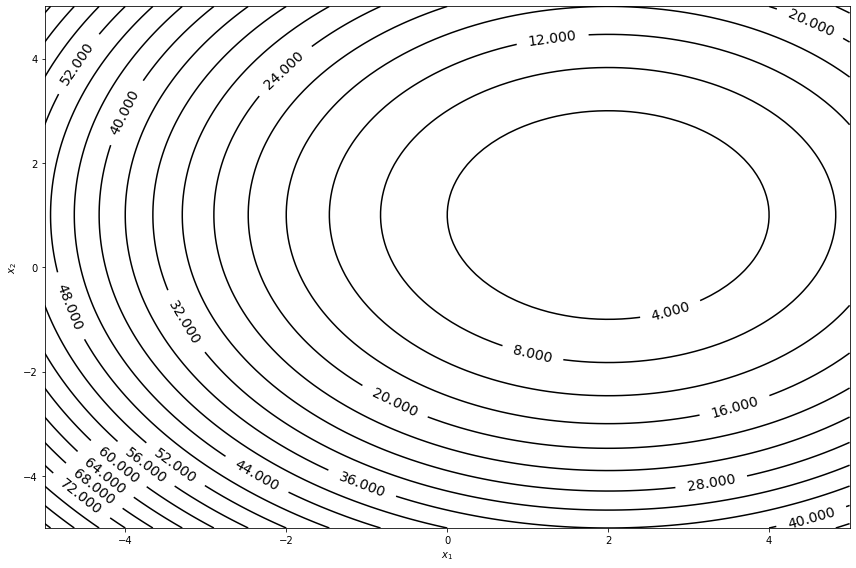

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12,8])
c=plt.contour(x1v, x2v, f(x).reshape(100,100), levels=25, colors='k')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
# plt.colorbar(c)
plt.clabel(c, c.levels, inline=True, fontsize=14)
plt.tight_layout()

In [39]:
# computing gradient
x_ = x[0] # point at which we want the gradient
gradf = grad(f)  # Obtain its gradient function
print(f'gradient at x1: {gradf(x_)}')
print(f'normalized gradient at x1: {gradf(x_) / np.linalg.norm(gradf(x_))}')

gradient at x1: [-14. -12.]
normalized gradient at x1: [-0.7592566  -0.65079135]


In [40]:
# computing Hessian
hess = hessian(f)#
print(f'Hessian at x1: {hess(x_)}')

Hessian at x1: [[2. 0.]
 [0. 2.]]


In [41]:
# Convert to NumPy arrays
B = hess(x_)
B_np = np.asarray(hess(x_))
print(type(B)) # JAX Array type
print(type(B_np)) # NumPy array type. Do this if the rest of your code uses NumPy.

<class 'jaxlib.xla_extension.Array'>
<class 'numpy.ndarray'>


### Autodiff using PyTorch.
While JAX is great, its NumPy wrapper can sometimes be limited. PyTorch is another alternative (that I know of). However, this option is not recommended unless you are already using PyTorch for some other reason.
Begin by installing PyTorch via pip: see https://pytorch.org/

In [42]:
import torch
from torch.autograd.functional import jacobian, hessian

In [46]:
x_tensor = torch.tensor(x_, dtype=torch.float32)
# gradient
g = jacobian(f, x_tensor)
print(f'Gradient {g}')

H = hessian(f, x_tensor)
print(f'Hessian {H}')

Gradient tensor([-14., -12.])
Hessian tensor([[2., 0.],
        [0., 2.]])


In [47]:
# Convert to NumPy array
g_np = g.numpy()
H_np = H.numpy()
print(type(g))
print(type(g_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


### Newton search direction
Recall that the Newton search direction is $-[\nabla^2f_k]^{-1} \nabla f_k$

In [52]:
pN = -np.matmul(np.linalg.inv(H_np), g_np)
print(f'Newton direction {pN}')

Newton direction [7. 6.]
